# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load Heart Attack Prediction Data](#2.5_Load_Heart_Attack_Prediction_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Number Of Missing Values By Column](#2.6.1_Number_Of_Missing_Values_By_Column)
    * [2.6.2 Numeric Features](#2.6.2_Numeric_Features)
      * [2.6.2.1 Numeric data summary](#2.6.2.1_Numeric_data_summary)
      * [2.6.2.2 Numeric data cleanup](#2.6.2.2_Numeric_data_cleanup)
      * [2.6.2.3 Distributions Of Feature Values](#2.6.2.3_Distributions_Of_Feature_Values)
        * [2.6.2.3.1 Features with Variable Data](#2.6.2.3.1_Features_with_Variable_Data)
        * [2.6.2.3.2 Features with Yes/No Data](#2.6.2.3.2_Features_with_Yes_No_Data)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Blood Pressure](#2.6.3.1_Blood_Pressure)
      * [2.6.3.2 Other Categorical Features](#2.6.3.2_Other_Categorical_Features)
      * [2.6.3.3 Distributions Of Feature Values by Heart Attack Risk](#2.6.3.3_Distributions_Of_Feature_Values_by_Heart_Attack_Risk)
        * [2.6.3.3.1 Sex](#2.6.3.3.1_Sex)
        * [2.6.3.3.2 Diet](#2.6.3.3.2_Diet)
        * [2.6.3.3.3 Country](#2.6.3.3.3_Country)
        * [2.6.3.3.4 Continent](#2.6.3.3.4_Continent)
        * [2.6.3.3.5 Hemisphere](#2.6.3.3.5_Hemisphere)
  * [2.7 Save data](#2.7_Save_data)
  * [2.8 Summary](#2.8_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The Heart Attack Risk Prediction Dataset serves as a valuable resource for finding the intricate dynamics of heart health and its predictors. By employing predictive analytics and machine learning on features relevant to heart health and lifestyle choices, researchers and healthcare professionals can work towards proactive strategies for heart disease prevention and management. 

This dataset encapsulates a diverse range of attributes including age, cholesterol levels, blood pressure, smoking habits, exercise patterns, dietary preferences, and more, aiming to elucidate the complex interplay of these variables in determining the likelihood of a heart attack. The dataset stands as a testament to collective efforts to enhance our understanding of cardiovascular health and pave the way for a healthier future.

## 2.3 Imports<a id='2.3_Imports'></a>

In [8]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2.4 Objectives<a id='2.4_Objectives'></a>

* Explore the Data
* Perform the cleaning steps
* Deal with missing values, if there were any

## 2.5 Load Heart Attack Prediction Data<a id='2.5_Load_Heart_Attack_Prediction_Data'></a>

In [12]:
# Read CSV File to DataFrame
data = pd.read_csv('../data/raw/heart_attack_prediction_dataset.csv')
# Set Patient ID as Index
data.set_index('Patient ID', inplace=True)

In [13]:
data.shape

(8763, 25)

In [14]:
#Call the info method on ski_data to see a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

In [15]:
#Call the head method on data to print the first 5 rows of the data
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Number Of Missing Values By Column<a id='2.6.1_Number_Of_Missing_Values_By_Column'></a>

In [18]:
# Check missing values
data.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### 2.6.2 Numeric Features<a id='2.6.2_Numeric_Features'></a>

#### 2.6.2.1 Numeric data summary<a id='2.6.2.1_Numeric_data_summary'></a>

In [21]:
# Numeric data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


#### 2.6.2.2 Numeric data Cleanup<a id='2.6.2.2_Numeric_data_cleanup'></a>

Values in columns Exercise Hours Per Week, Sedentary Hours Per Day and BMI is float. Round these values to 3 decimal places

In [24]:
# Round values to 3 decimal places
data['Exercise Hours Per Week'] = round(data['Exercise Hours Per Week'], 3)
data['Sedentary Hours Per Day'] = round(data['Sedentary Hours Per Day'], 3)
data['BMI'] = round(data['BMI'], 3)

#### 2.6.2.3 Distributions Of Feature Values<a id='2.6.2.3_Distributions_Of_Feature_Values'></a>

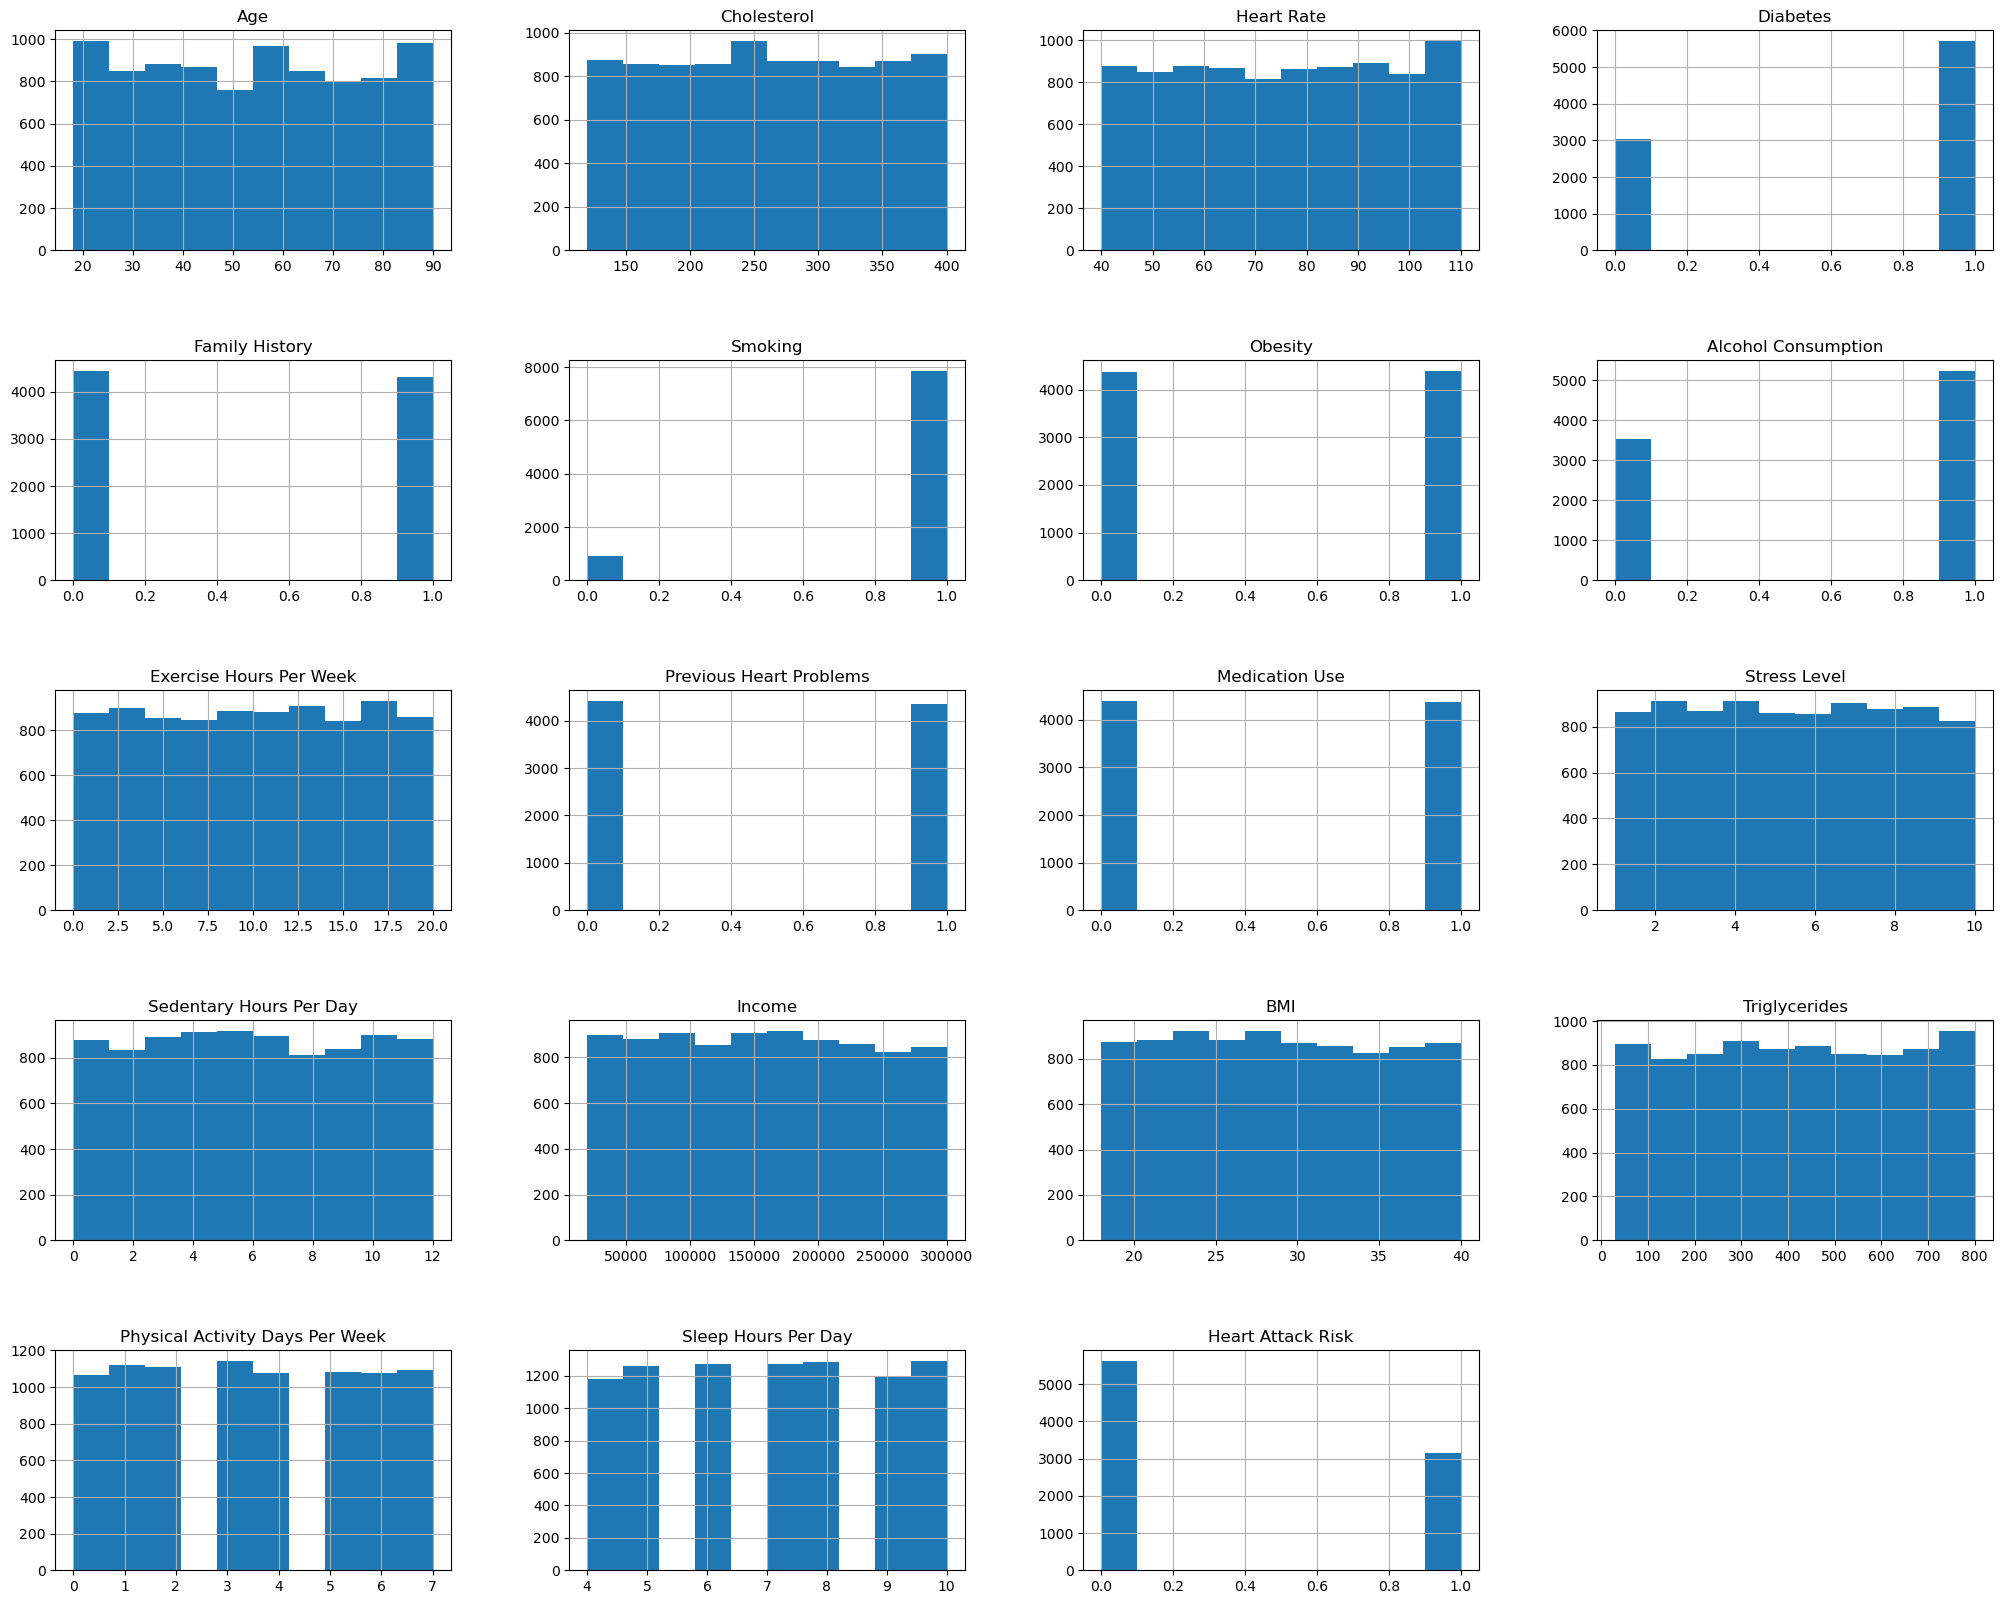

In [26]:
data.hist(figsize=(25,20))
plt.subplots_adjust(hspace=0.5)

Distribution looks good for all features

#### 2.6.2.3.1 Features with Variable Data<a id='2.6.2.3.1_Features_with_Variable_Data'></a>

These features has an even distribution except for Physical Activity Days Per Week and Sleep Hours Per Day but good to keep for next steps

* Age
* Cholesterol
* Heart Rate
* Exercise Hours Per Week
* Stress Level
* Sedentary Hours Per Day
* Income
* BMI
* Triglycerides
* Physical Activity Days Per Week
* Sleep Hours Per Day

#### 2.6.2.3.2 Features with Yes/No Data<a id='2.6.2.3.2_Features_with_Yes_No_Data'></a>

These features has an acceptable distribution that we can keep it for next steps and no further cleanup required

* Diabetes
* Family History
* Smoking
* Obesity
* Alcohol Consumption
* Previous Heart Problems
* Heart Attack Risk

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

#### 2.6.3.1 Blood Pressure<a id='2.6.3.1_Blood_Pressure'></a>

Blood Pressure values are String with Systolic and Diastolic value. These values can split into two numeric values

In [36]:
# Split the values and keep it as seperate columns in data set

data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

Systolic and Diastolic colums are object types and covert that to int

In [39]:
# Convert Systolic and Diastolic columns to int type

data['Systolic'] = data['Systolic'].astype(int)
data['Diastolic'] = data['Diastolic'].astype(int)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8763 entries, BMW7812 to ZWN9666
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart P

#### 2.6.3.2 Other Categorical Features<a id='2.6.3.2_Other_Categorical_Features'></a>

Remaining Categorical Features are 

* Sex
* Diet
* Country
* Continent
* Hemisphere

In [43]:
# categorical features
categorical_columns = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']


Values in these categorical fields looks good and no further cleanup required

In [45]:
def plotPatientsWithHeartRateRisk(df, column):
    """
        Find No of Patients with Heart Rate Risk and Not with Heart Rate Risk
        Then Plot Bar Graph for the feature column
    """
    heart_attack_risk_by_feature = df.groupby([column, "Heart Attack Risk"]).count().reset_index()
    heart_attack_risk_by_feature = heart_attack_risk_by_feature[[column, "Heart Attack Risk", "Age"]]
    heart_attack_risk_by_feature = heart_attack_risk_by_feature.rename(columns={'Age': 'Count'})

    ha = heart_attack_risk_by_feature
    ha = ha.pivot(index=column, columns="Heart Attack Risk", values='Count')
    ha = ha.reset_index()
    ha = ha.rename(columns={0: 'No Risk'})
    ha = ha.rename(columns={1: 'Risk'})
    ha = ha.set_index(column)

    ha.plot(kind='bar', figsize=(20, 6))
    plt.title('Patients with Heart Attack Risk by ' + column)
    plt.xlabel(column)
    plt.ylabel('No of Patients')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#### 2.6.3.3 Distributions Of Feature Values by Heart Attack Risk<a id='2.6.3.3_Distributions_Of_Feature_Values_by_Heart_Attack_Risk'></a>

#### 2.6.3.3.1 Sex<a id='2.6.3.3.1_Sex'></a>

In [48]:
# Unique Values
data[categorical_columns[0]].value_counts()  

Sex
Male      6111
Female    2652
Name: count, dtype: int64

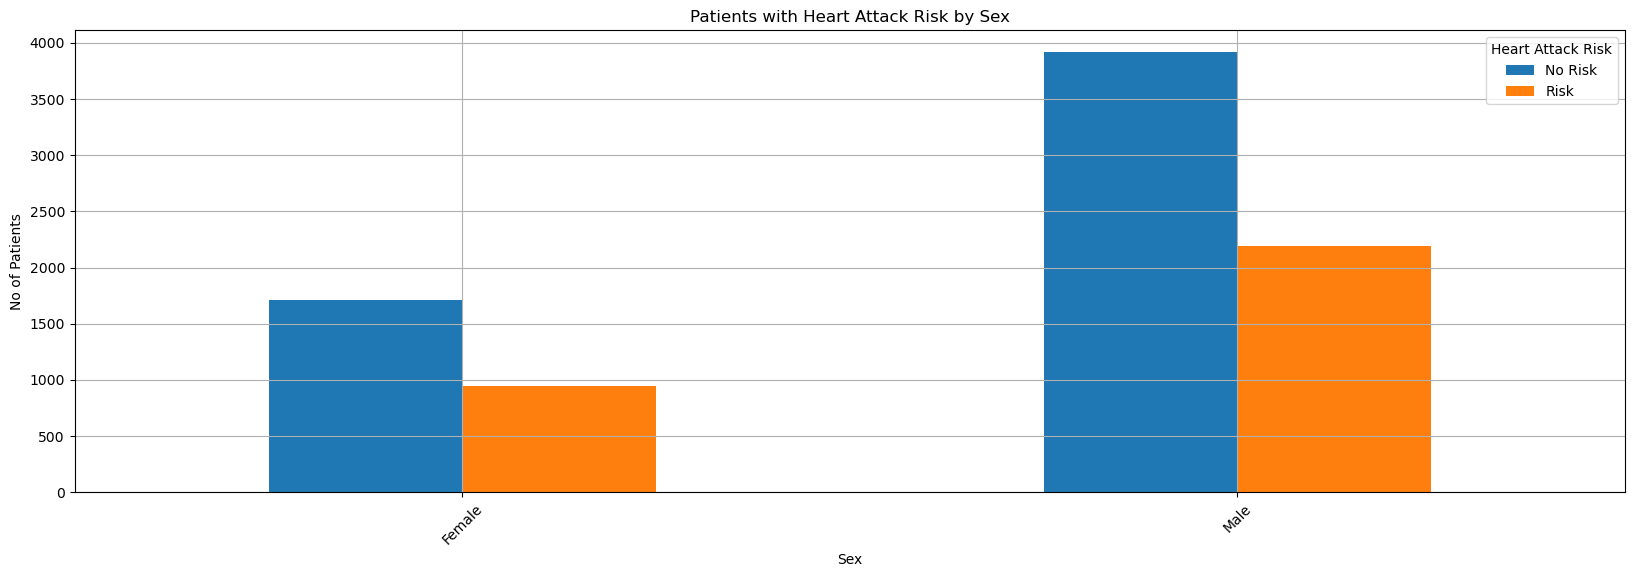

In [49]:
# Distribution for feature Sex
plotPatientsWithHeartRateRisk(data, categorical_columns[0])

#### 2.6.3.3.2 Diet<a id='2.6.3.3.2_Diet'></a>

In [51]:
# Unique Values
data[categorical_columns[1]].value_counts()  

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

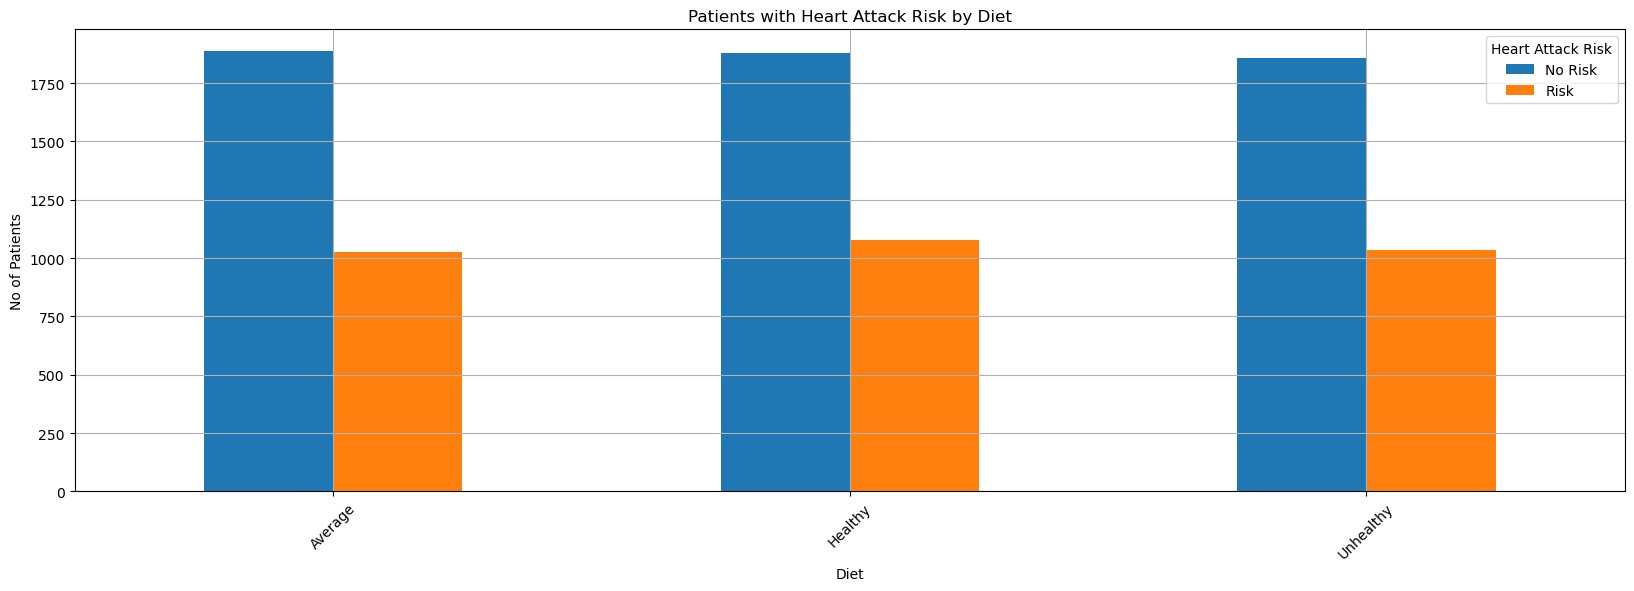

In [52]:
# Distribution for feature Diet
plotPatientsWithHeartRateRisk(data, categorical_columns[1])

#### 2.6.3.3.3 Country<a id='2.6.3.3.3_Country'></a>

In [54]:
# Unique Values
data[categorical_columns[2]].value_counts()  

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

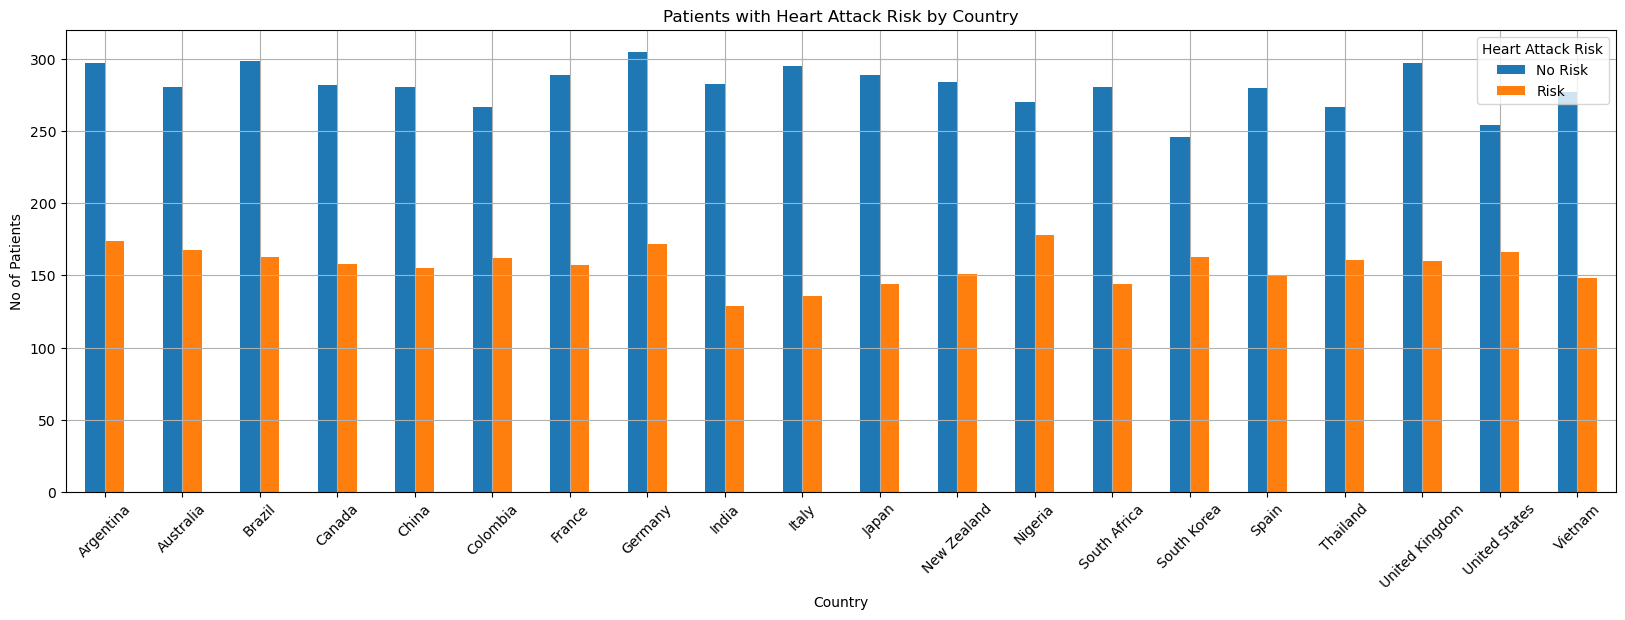

In [55]:
# Distribution for feature Country
plotPatientsWithHeartRateRisk(data, categorical_columns[2])

#### 2.6.3.3.4 Continent<a id='2.6.3.3.4_Continent'></a>

In [57]:
# Unique Values
data[categorical_columns[3]].value_counts()  

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64

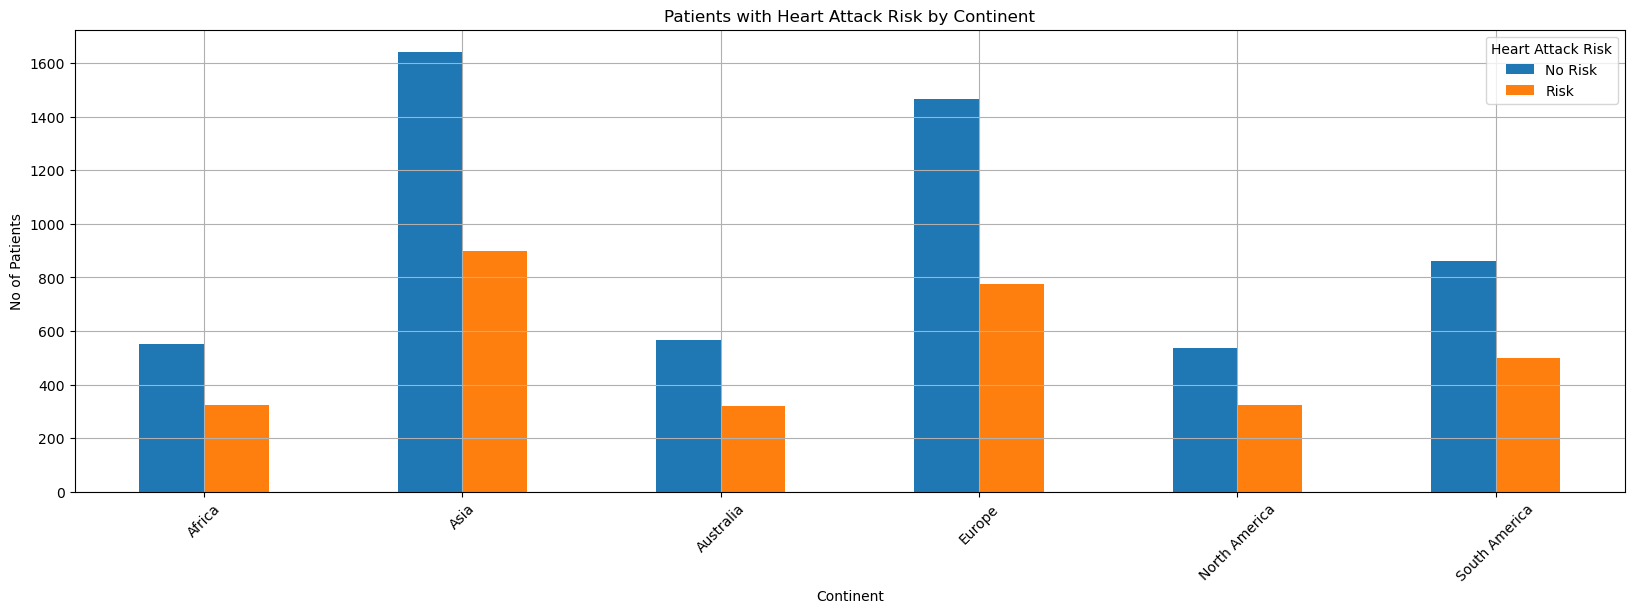

In [58]:
# Distribution for feature Continent
plotPatientsWithHeartRateRisk(data, categorical_columns[3])

#### 2.6.3.3.5 Hemisphere<a id='2.6.3.3.5_Hemisphere'></a>

In [60]:
# Unique Values
data[categorical_columns[4]].value_counts()  

Hemisphere
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: count, dtype: int64

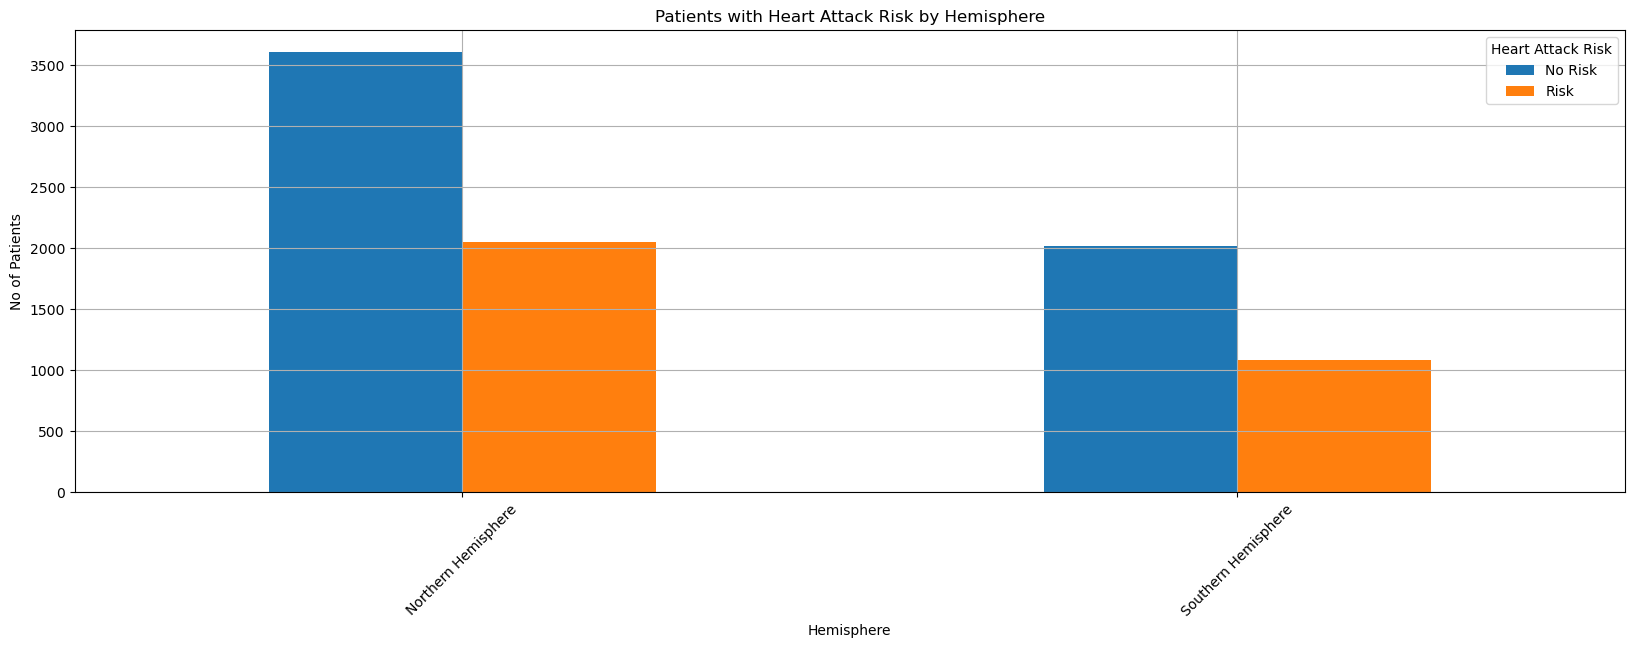

In [61]:
# Distribution for feature Hemisphere
plotPatientsWithHeartRateRisk(data, categorical_columns[4])

## 2.7 Save data<a id='2.7_Save_data'></a>

In [63]:
data.shape

(8763, 27)

In [64]:
data.to_csv('../data/processed/heart_attack_prediction_dataset_cleaned.csv', index=False)

## 2.8 Summary<a id='2.8_Summary'></a>

Initial Heart Risk Prediction contains 8763 rows and 25 columns. There was no missing data in the dataset.

**Categorical Features**

These are the categorical features and all has valid values

* Blood Pressure - This column is type string with Systolic and Diastolic values seperated by /. This value converted into two seperate columns Systolic and Diastolic
* Sex - This column has values Male and Female
* Diet - This column has values Healthy, Average and Unhealthy
* Country - This column has valid country names.
* Continent - This column has valid continents.
* Hemisphere - This column has values Northern Hemisphere and Southern Hemisphere

Distribution of these features related to Heart Attack Risk feature looks good and all these can be considered for next steps.

**Numeric Features**

***These are the features with variable values. Feature values Exercise Hours Per Week, Sedentary Hours Per Day and BMI is float. Rounded these values to 3 decimal places. These has an even distribution except for Physical Activity Days Per Week and Sleep Hours Per Day and good for next steps***

* Age
* Cholesterol
* Heart Rate
* Exercise Hours Per Week
* Stress Level
* Sedentary Hours Per Day
* Income
* BMI
* Triglycerides
* Physical Activity Days Per Week
* Sleep Hours Per Day

***These are the features with yes/no values. These has has an acceptable distribution that we can keep it for next steps and no further cleanup required***

* Diabetes
* Family History
* Smoking
* Obesity
* Alcohol Consumption
* Previous Heart Problems
* Heart Attack Risk

**Target Feature**

After the data correction, dataset has 8763 rows and 27 columns. 

**Target Feature we are looking is "Heart Attack Risk". All other feature values looks good to find a correlation with the target feature and modelling in next steps.**